In [1]:
#import of libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline


In [2]:
#downloading of dataset
!wget -O teleCust1000t.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/teleCust1000t.csv

--2021-03-20 15:15:59--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/teleCust1000t.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36047 (35K) [text/csv]
Saving to: ‘teleCust1000t.csv’

teleCust1000t.csv   100%[===================>]  35.20K  --.-KB/s    in 0.02s   

2021-03-20 15:16:00 (1.54 MB/s) - ‘teleCust1000t.csv’ saved [36047/36047]



In [3]:
#loading of dataset
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


#data vizulization and reserach

In [4]:
df.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


In [5]:
#now here we see diffrent classes present in 
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6d25f43790>]],
      dtype=object)

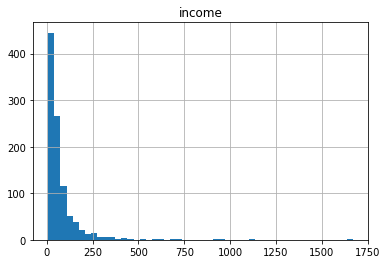

In [6]:
#here we see diffrent vizliztion of data 
df.hist(column='income', bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6d25eb7a50>]],
      dtype=object)

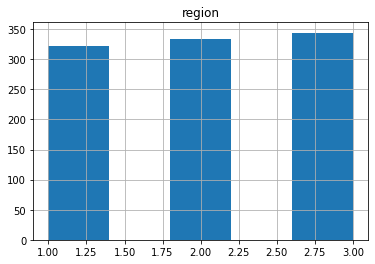

In [7]:
df.hist(column='region', bins=5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6d25964650>]],
      dtype=object)

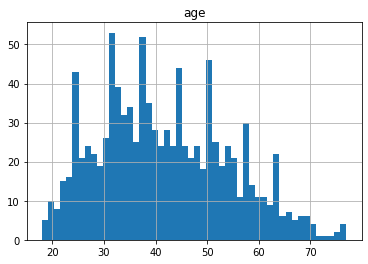

In [8]:
df.hist(column='age', bins=50)

In [9]:
#lets define feature of set as x
df.columns
x = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', ]].values
x[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [10]:
#lets define labels as y
y=df[['custcat']].values
y[0:5]

array([[1],
       [4],
       [3],
       [1],
       [3]])

<h3> as we here see data is in diffrent data types so we should normlize it so that model training and testing is easy </h3> 
<br>
<h3>To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array</h3>

In [11]:
print(x[0:5])

[[  2.  13.  44.   1.   9.  64.   4.   5.   0.   0.   2.]
 [  3.  11.  33.   1.   7. 136.   5.   5.   0.   0.   6.]
 [  3.  68.  52.   1.  24. 116.   1.  29.   0.   1.   2.]
 [  2.  33.  33.   0.  12.  33.   2.   0.   0.   1.   1.]
 [  2.  23.  30.   1.   9.  30.   1.   2.   0.   0.   4.]]


In [12]:
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
print(x[0:5])

[[-0.02696767 -1.055125    0.18450456  1.0100505  -0.25303431 -0.12650641
   1.0877526  -0.5941226  -0.22207644 -1.03459817 -0.23065004]
 [ 1.19883553 -1.14880563 -0.69181243  1.0100505  -0.4514148   0.54644972
   1.9062271  -0.5941226  -0.22207644 -1.03459817  2.55666158]
 [ 1.19883553  1.52109247  0.82182601  1.0100505   1.23481934  0.35951747
  -1.36767088  1.78752803 -0.22207644  0.96655883 -0.23065004]
 [-0.02696767 -0.11831864 -0.69181243 -0.9900495   0.04453642 -0.41625141
  -0.54919639 -1.09029981 -0.22207644  0.96655883 -0.92747794]
 [-0.02696767 -0.58672182 -0.93080797  1.0100505  -0.25303431 -0.44429125
  -1.36767088 -0.89182893 -0.22207644 -1.03459817  1.16300577]]


<h3> Here testing and training is started </h3>


In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4)
print("Shape of x_train :- {} Shape of y_train :- {} ".format(x_train.shape,y_train.shape))
print("Shape of x_test : {} Shape of y_test : {}".format(x_test.shape,y_test.shape))

Shape of x_train :- (800, 11) Shape of y_train :- (800, 1) 
Shape of x_test : (200, 11) Shape of y_test : (200, 1)


In [14]:
#now we built classifre model
from sklearn.neighbors import KNeighborsClassifier

In [22]:
k =4 
model_4 = KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)
model_4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [23]:
yhat_4 = model_4.predict(x_test)
yhat[0:5]

array([1, 1, 3, 2, 4])

In [20]:
#here we crate antor mode with diffrent value of k
k=9
model_9 = KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)
model_9
yhat_9 = model_9.predict(x_test)
yhat_9[0:5]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


array([3, 1, 3, 2, 4])

#model evlaulation 

In [24]:
from sklearn import metrics

In [28]:
print("Train and test accuaracy for k=4")
print("Train accuaracy: ",metrics.accuracy_score(y_train,model_4.predict(x_train)))
print("Test accuaracy :" ,metrics.accuracy_score(y_test,yhat_4))

Train and test accuaracy for k=4
Train accuaracy:  0.5475
Test accuaracy : 0.32


In [29]:
print("Train and test accuaracy for k=9")
print("Train accuaracy: ",metrics.accuracy_score(y_train,model_9.predict(x_train)))
print("Test accuaracy :" ,metrics.accuracy_score(y_test,yhat_9))

Train and test accuaracy for k=9
Train accuaracy:  0.5025
Test accuaracy : 0.34


In [53]:
Ks = 800
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    model =  KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=model.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ,
       0.33 , 0.315, 0.34 , 0.33 , 0.315, 0.34 , 0.36 , 0.355, 0.35 ,
       0.345, 0.335, 0.35 , 0.36 , 0.37 , 0.365, 0.365, 0.365, 0.35 ,
       0.36 , 0.38 , 0.385, 0.395, 0.395, 0.38 , 0.37 , 0.365, 0.385,
       0.395, 0.41 , 0.395, 0.395, 0.395, 0.38 , 0.39 , 0.375, 0.365,
       0.38 , 0.375, 0.375, 0.365, 0.36 , 0.36 , 0.365, 0.37 , 0.38 ,
       0.37 , 0.37 , 0.37 , 0.36 , 0.35 , 0.36 , 0.355, 0.36 , 0.36 ,
       0.36 , 0.34 , 0.34 , 0.345, 0.35 , 0.35 , 0.355, 0.365, 0.355,
       0.355, 0.365, 0.37 , 0.37 , 0.37 , 0.35 , 0.35 , 0.35 , 0.35 ,
       0.36 , 0.355, 0.33 , 0.32 , 0.345, 0.345, 0.345, 0.335, 0.345,
       0.355, 0.345, 0.345, 0.34 , 0.34 , 0.335, 0.345, 0.325, 0.315,
       0.31 , 0.325, 0.32 , 0.32 , 0.325, 0.335, 0.34 , 0.34 , 0.335,
       0.325, 0.34 , 0.33 , 0.325, 0.335, 0.325, 0.325, 0.335, 0.345,
       0.335, 0.34 , 0.345, 0.34 , 0.345, 0.35 , 0.35 , 0.345, 0.345,
       0.345, 0.35 ,

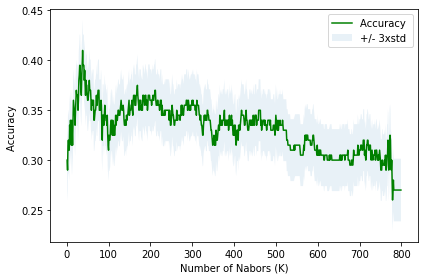

In [54]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [55]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.41 with k= 38
